In [6]:
# Import packages
import cv2
import math
import skimage.io

# Import some functions to the global namespace for convenience
from scipy.ndimage import *
from scipy.fft import *
from scipy.signal import *
from scipy.stats import *
from skimage.filters import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import *
import skimage.util
from mpl_toolkits import mplot3d

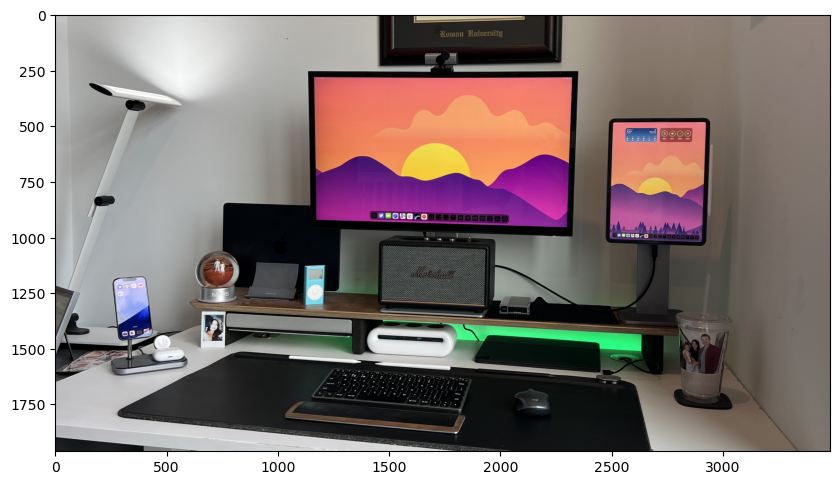

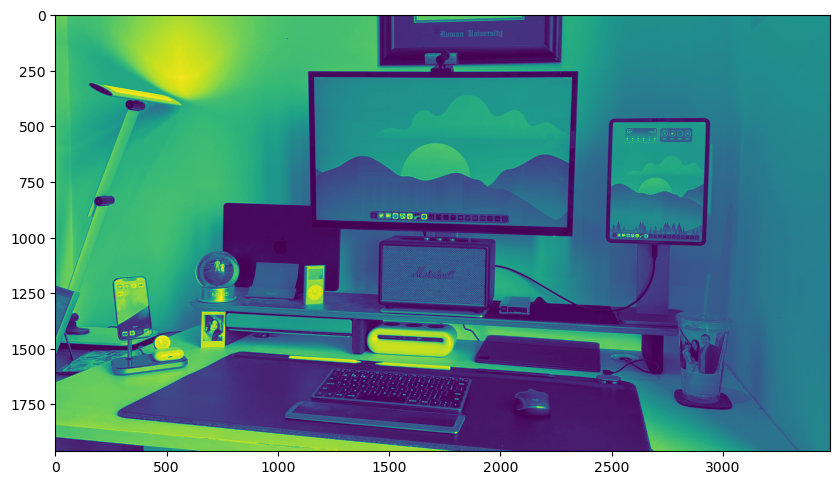

In [2]:
url = "http://sipi.usc.edu/database/download.php?vol=misc&img=4.2.07"
url = "https://9to5mac.com/wp-content/uploads/sites/6/2023/01/IMG_4930-2-min.jpg"
img = skimage.io.imread(url, plugin = 'pil')
#img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

plt.figure(figsize=(10,6))
plt.imshow (img)
plt.show ()

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,6))
plt.imshow (img)
plt.show ()

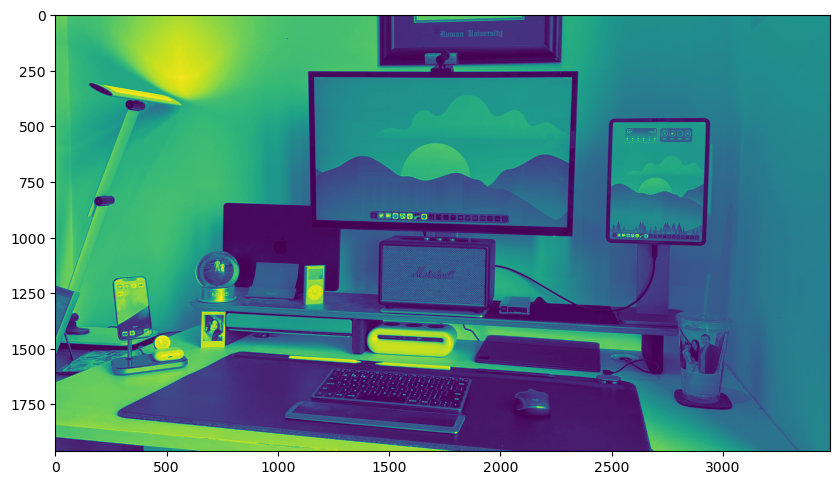

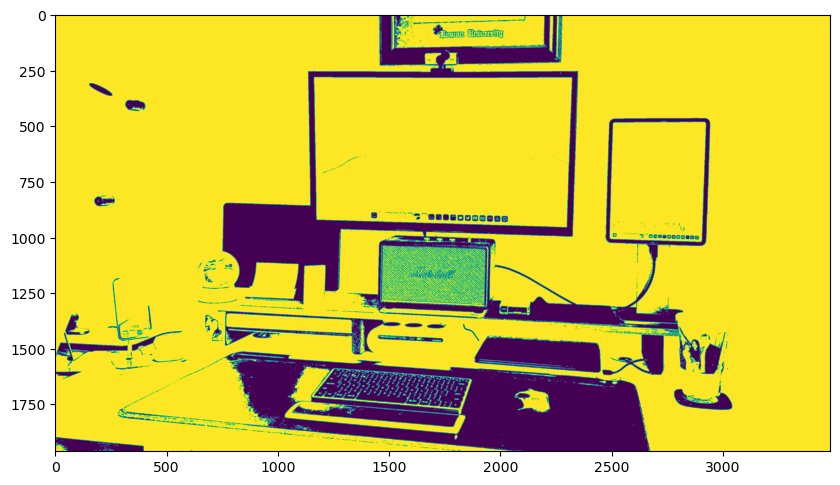

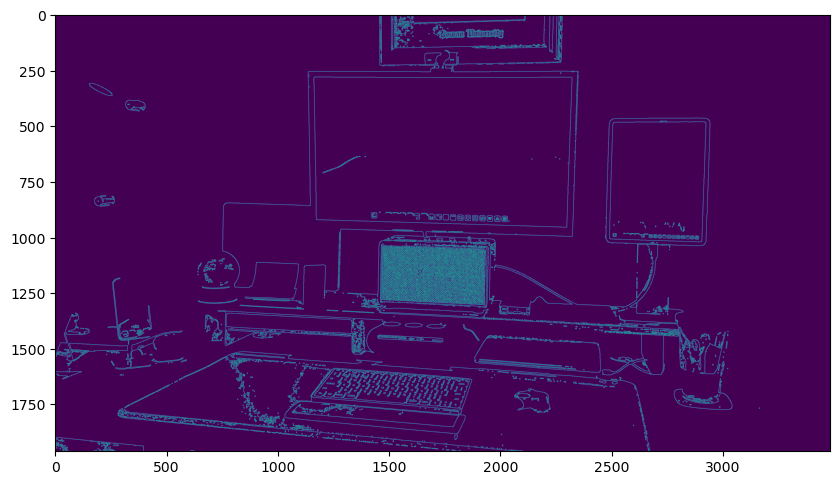

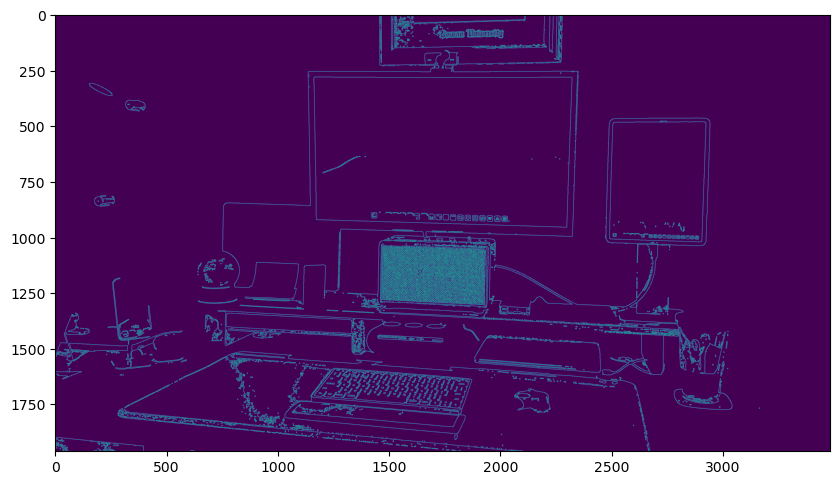

In [3]:
_, thresh = cv2.threshold(img, 30, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10,6))
plt.imshow (img)
plt.show ()

kernel_size = 5
blur_gray = cv2.GaussianBlur(thresh, (kernel_size, kernel_size), 0)

plt.figure(figsize=(10,6))
plt.imshow (blur_gray)
plt.show ()

#edges = cv2.Canny((blur_gray * 255).astype(np.uint8), 10, 200, apertureSize=3)
#edges = cv2.Canny(img, 150, 200)
edges = cv2.Canny(blur_gray, 10, 200)

plt.figure(figsize=(10,6))
plt.imshow (edges)
plt.show ()

gray_img_eqhist=cv2.equalizeHist(edges)
hist=cv2.calcHist(gray_img_eqhist,[0],None,[256],[0,256])

clahe=cv2.createCLAHE(clipLimit=40)
gray_img_clahe=clahe.apply(gray_img_eqhist)

th=20
max_val=255
ret ,o6=  cv2.threshold(gray_img_clahe, th, max_val,  cv2.THRESH_OTSU)

thresh2 = cv2.adaptiveThreshold(edges, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 3)


ret, thresh = cv2.threshold(o6, 150, 255, cv2.THRESH_BINARY)



plt.figure(figsize=(10,6))
plt.imshow (thresh)
plt.show ()

In [4]:
#Create default parametrization LSD
lsd = cv2.createLineSegmentDetector(0)

# Find Canny edges 
edges = cv2.Canny(o6, 30, 200)

#Detect lines in the image
lines = lsd.detect(edges)[0] #Position 0 of the returned tuple are the detected lines

In [18]:
def dist_point_line (p1, p2, p):
    return norm(np.cross (p1 - p, p - p2)) / norm(p1 - p)

def dist_point_point (p1, p2):
    return math.dist (p1, p2)

def dist_line_line (l1, l2):
    return abs ((l1[0][1] - l1[1][1]) / (l1[0][0] - l1[1][0]) - (l2[0][1] - l2[1][1]) / (l2[0][0] - l2[1][0]))

In [ ]:
rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 90  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 40  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = np.copy(img) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(o6, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

(2503, 1, 4)


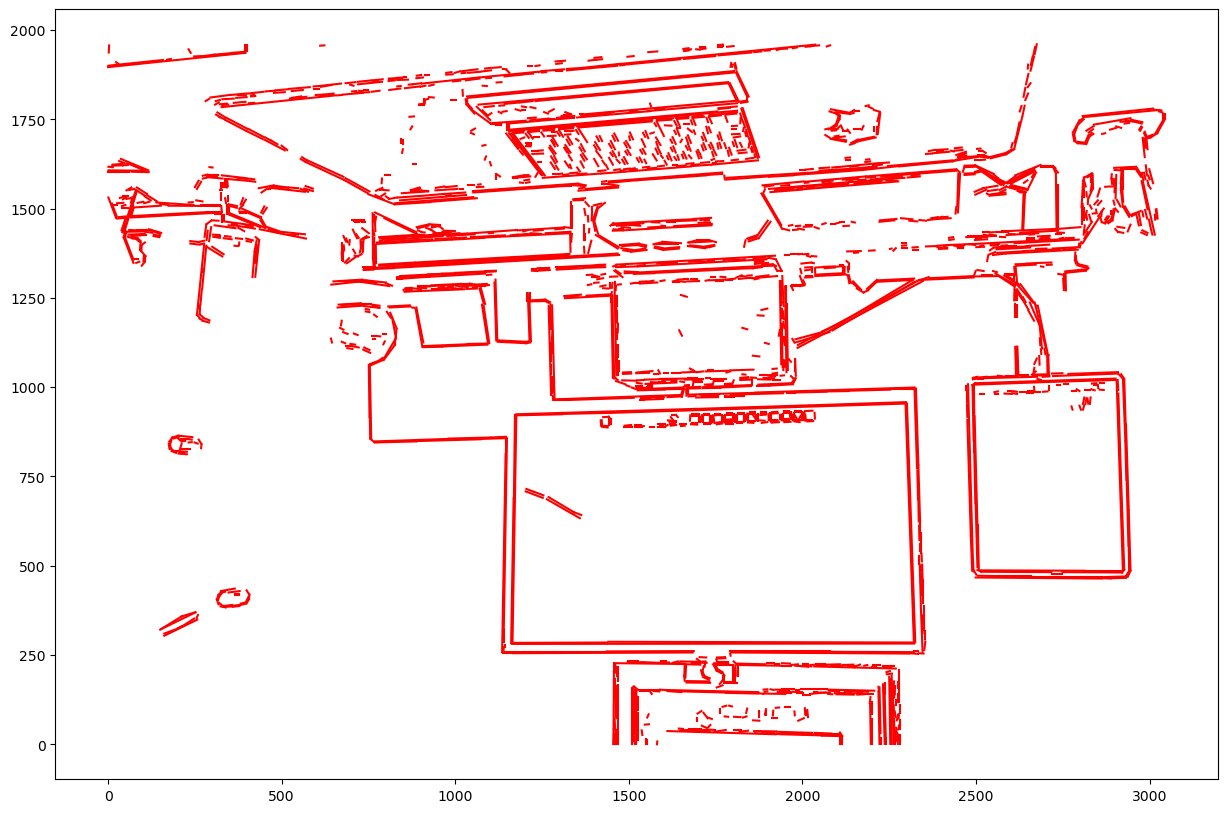

(1961, 3483)
min_len
399.71001988941936
[[array([1441.,  287.], dtype=float32), array([2319.,  285.], dtype=float32)], [array([1149.,  857.], dtype=float32), array([1140.,  329.], dtype=float32)], [array([2321.,  287.], dtype=float32), array([2297.,  953.], dtype=float32)], [array([1135.,  258.], dtype=float32), array([1145.,  813.], dtype=float32)], [array([2297.,  954.], dtype=float32), array([1451.,  928.], dtype=float32)], [array([1472., 1370.], dtype=float32), array([ 826., 1334.], dtype=float32)], [array([1464., 1343.], dtype=float32), array([1921., 1368.], dtype=float32)], [array([1159., 1721.], dtype=float32), array([1755., 1772.], dtype=float32)], [array([1372., 1764.], dtype=float32), array([1811., 1802.], dtype=float32)], [array([1034., 1814.], dtype=float32), array([1803., 1885.], dtype=float32)], [array([1803., 1881.], dtype=float32), array([1037., 1810.], dtype=float32)], [array([1067., 1791.], dtype=float32), array([1786., 1854.], dtype=float32)], [array([1476., 1905.], 

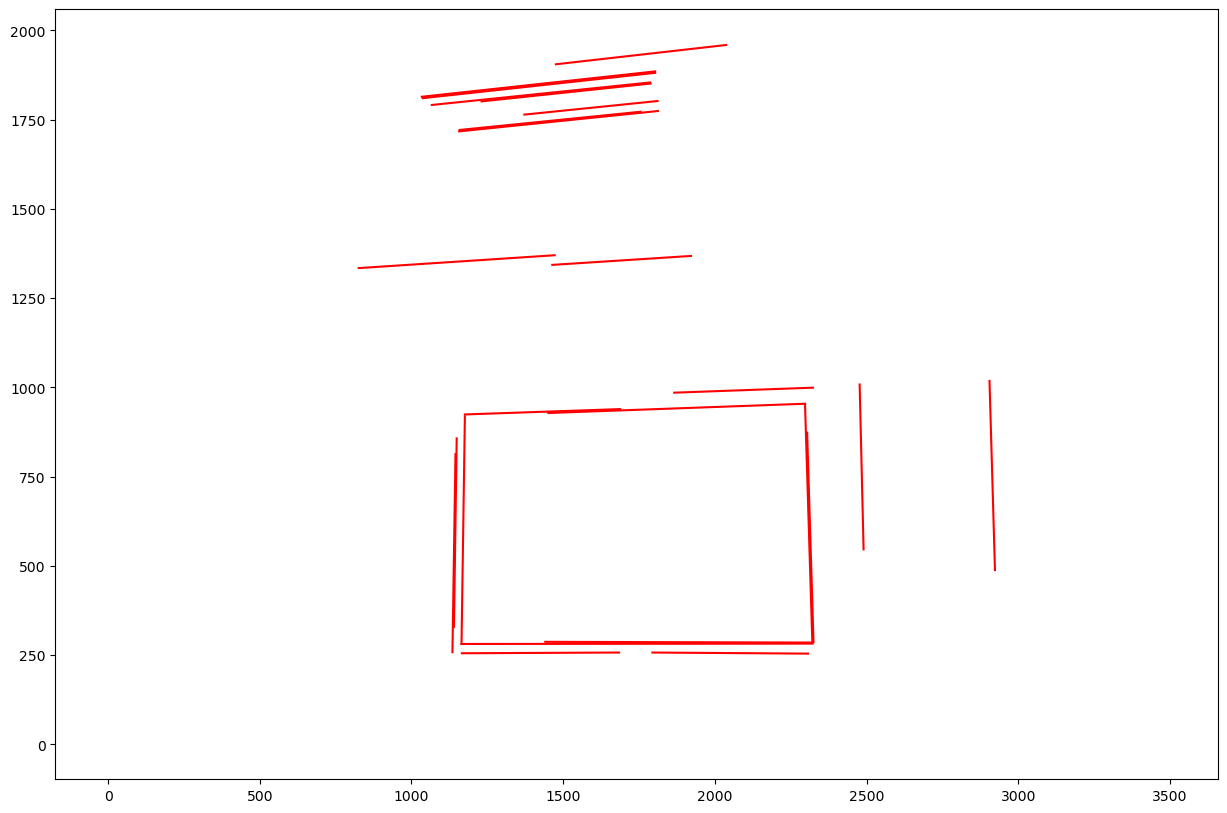

(2503, 1, 4)


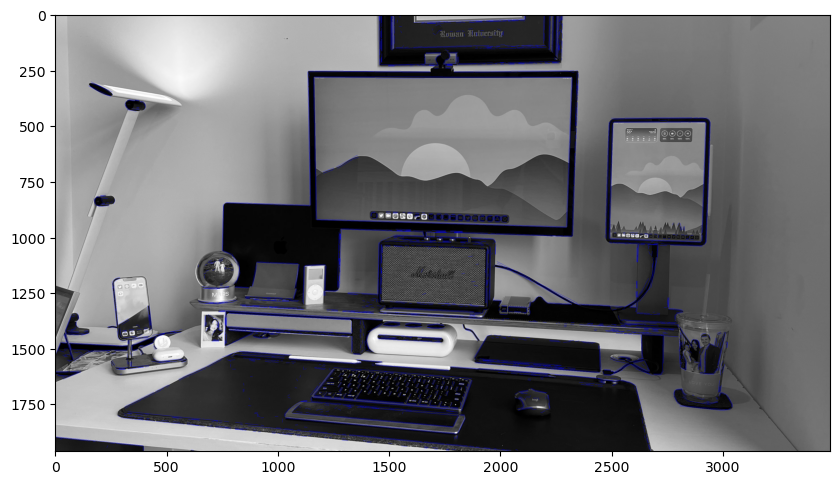

In [17]:
min_len = np.sqrt (img.shape[0]**2 + img.shape[1]**2) / 10.0


#print (lines.shape)
#print (np.array ([[[0, 0, 400, 400]]]).shape)
#print (np.array ([[[0, 0, 400, 400]]]))
#lines = np.append (lines, np.array ([[[0, 0, 400, 400]]]), axis = 0)
#lines[0] = [[0, 0, 499, 499]]

print (lines.shape)
#print (lines)

lines = np.round (lines)

plt.figure(figsize=(15,10))
for line in lines:
    plt.plot ([line[0][0], line[0][2]], [line[0][1], line[0][3]], 'r-')
plt.show ()

print (img.shape)

print ("min_len")
print (min_len)

new_lines = []
for line in lines:
    if math.dist ([line[0][0] - line[0][2]], [line[0][1] - line[0][3]]) > min_len:
        new_lines.append ([line[0][0:2], line[0][2:4]])
print (new_lines)




plt.figure(figsize=(15,10))
plt.plot (img.shape[1], img.shape[0])
plt.plot (0, 0)
for line in new_lines:
    plt.plot ([line[0][0], line[1][0]], [line[0][1], line[1][1]], 'r-')
plt.show ()


point_point_max_dist = 5
point_line_max_dist = 5
temp_new_lines = []
for line_i in new_lines:
    for line_j in new_lines:
        if line_i != line_j:
            if 

#Draw detected lines in the image
drawn_img = lsd.drawSegments(img,lines)

print (lines.shape)
#print (lines)

plt.figure(figsize=(10,6))
plt.imshow (drawn_img)
plt.show ()